In [1]:
import pandas as pd
import numpy as np
import matplotlib.colors as mc # For the legend
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import MinMaxScaler
import os
from data_functions import plot_data 

/home/varsallz/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


Exchange Rate from USDA -ERS

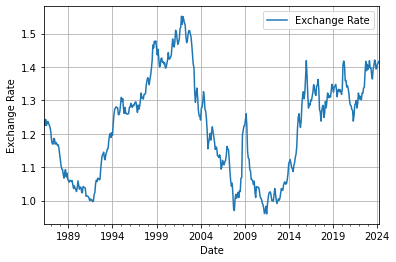

In [2]:
### Exchange Rate #### from USDA -ERS
df2 = pd.DataFrame(pd.read_csv("../cfpr_datasets/realmonthlycountryexchangerates.csv", encoding= 'unicode_escape'))
df2 = df2[199:657]
df2 = df2.iloc[:,:3]
df2 = df2.dropna()
df2
#renaming each columns
df2 = df2.rename(columns= {"Monthly real exchange rates (local currency per U.S. dollar)": 'Month', "Unnamed: 1": "Year","Unnamed: 2": "Exchange Rate"})
df2

# changes the object type to numeric
df2[df2.columns[2]]=pd.to_numeric(df2[df2.columns[2]])

## Setting date as index
df2["Date"] = df2["Year"].astype(str) + '-' + df2["Month"].astype(str) + '-01'
df2.drop(['Year', 'Month'], axis='columns', inplace=True)
df2['Date'] = pd.to_datetime(df2['Date'])
df2 = df2.set_index(['Date'])
df2
# #Plotting
df2['Exchange Rate'].plot()
plt.xlabel('Date') 
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()

scaler = MinMaxScaler(feature_range=(0, 1))
df2 = pd.DataFrame(scaler.fit_transform(df2), columns=df2.columns, index=df2.index)

file_name = 'Exchange_rate_processed.csv'
df2.to_csv(file_name, index=True)

Unemployment from World Bank

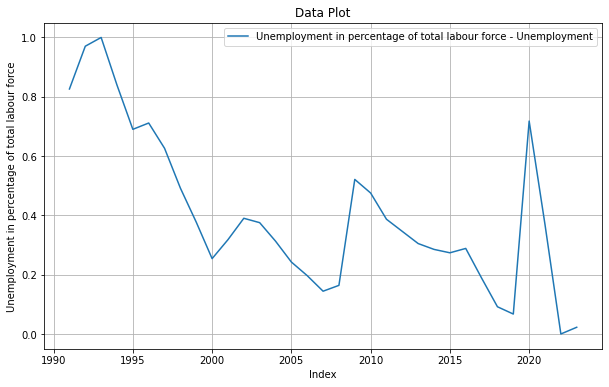

In [3]:
df1 = pd.DataFrame(pd.read_csv("../cfpr_datasets/World_Bank_Unemployment.csv", encoding= 'unicode_escape'))
df1 = df1.iloc[[3,39]]
df1 = df1.dropna(axis=1)
df1 = df1.iloc[:, 4:]
df1 = df1.transpose()
df1.head(10)

df1 = df1.rename(columns= {df1.columns[0]: 'Date', df1.columns[1]: "Unemployment"})
df1 = df1.set_index('Date')
df1
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = pd.DataFrame(scaler.fit_transform(df1), columns=df1.columns, index=df1.index)

file_name = 'Unemployment.csv'
df1.to_csv(file_name, index=True)
plot_data(df1, 'Unemployment in percentage of total labour force', 'Unemployment in percentage of total labour force')

Inflation Rate from IMF

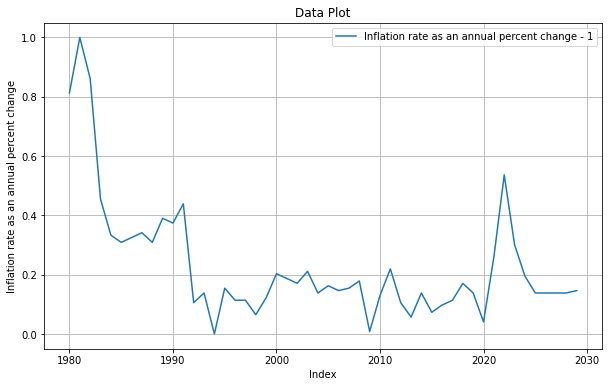

In [4]:
df1 = pd.DataFrame(pd.read_csv("../cfpr_datasets/IMF_inflation.csv", encoding= 'unicode_escape'))

df1 = df1.transpose()
df1 = df1.dropna(axis=1)
df1 = df1.drop(df1.index[0])

df1.index = pd.to_datetime(df1.index)

scaler = MinMaxScaler(feature_range=(0, 1))
df1 = pd.DataFrame(scaler.fit_transform(df1), columns=df1.columns, index=df1.index)

plot_data(df1, 'Inflation rate as an annual percent change', 'Inflation rate as an annual percent change')


file_name = 'Inflation_Rate.csv'
df1.to_csv(file_name, index=True)

Debt from IMF (Private debt, loans and debt securities (Percent of GDP))

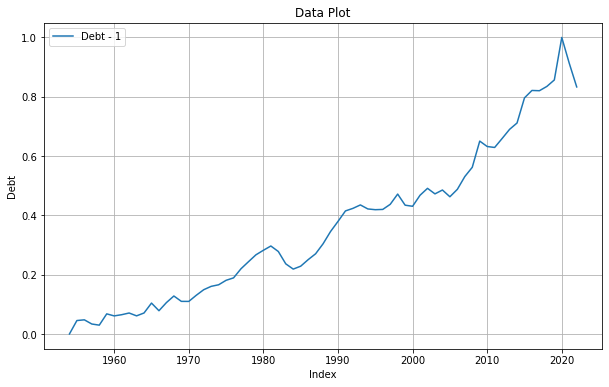

In [5]:
df1 = pd.DataFrame(pd.read_csv("../cfpr_datasets/IMF_Debt.csv", encoding= 'unicode_escape'))

df1 = df1.transpose()
df1 = df1.dropna(axis=1)
df1 = df1.drop(df1.index[0])
df1.replace('no data', pd.NA, inplace=True)
df1 = df1.dropna()

df1.index = pd.to_datetime(df1.index)
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = pd.DataFrame(scaler.fit_transform(df1), columns=df1.columns, index=df1.index)

plot_data(df1, 'Debt','Debt')

file_name = 'Debt.csv'
df1.to_csv(file_name, index=True)



GDP from IMF

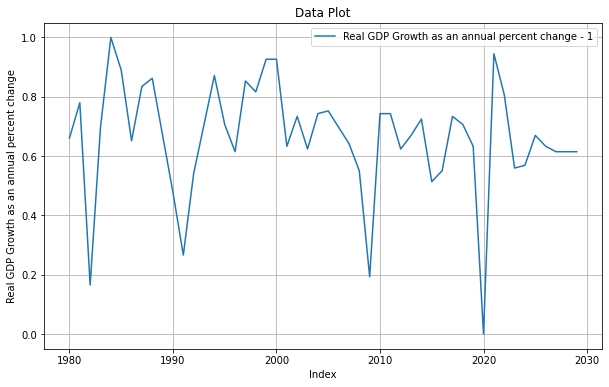

In [6]:
df1 = pd.DataFrame(pd.read_csv("../cfpr_datasets/IMF_GDP_Growth.csv", encoding= 'unicode_escape'))

df1 = df1.transpose()
df1 = df1.dropna(axis=1)
df1 = df1.drop(df1.index[0])
df1.replace('no data', pd.NA, inplace=True)
df1 = df1.dropna()

df1.index = pd.to_datetime(df1.index)
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = pd.DataFrame(scaler.fit_transform(df1), columns=df1.columns, index=df1.index)

plot_data(df1, 'Real GDP Growth as an annual percent change', 'Real GDP Growth as an annual percent change')


file_name = 'GDP.csv'
df1.to_csv(file_name, index=True)